<a href="https://colab.research.google.com/github/Alex-Bernal27/Colab/blob/main/IAP_Segundo_Parcial_T_sne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.manifold.t_sne module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#Cargamos los conjuntos de datos clásicos de dígitos escritos a mano. Contiene 1797 imágenes con \ (8 * 8 = 64 \) píxeles cada una. 
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

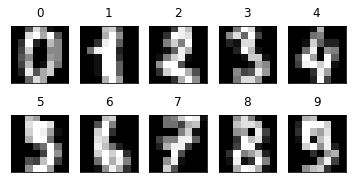

In [ ]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

In [ ]:
#Ahora ejecutemos el algoritmo t-SNE en el conjunto de datos.
# Primero reordenamos los puntos de datos de acuerdo con los números escritos a mano.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

In [ ]:
X.shape

(1797, 64)

In [ ]:
RS = 20150101
digits_proj = TSNE(random_state=RS).fit_transform(X)

In [ ]:
#función que se utiliza para mostrar el conjunto de datos transformado. El color de cada punto se refiere al dígito real.
def scatter(x, colors):
    # Elegimos una paleta de colores con seaborn. 
    palette = np.array(sns.color_palette("hls", 10))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # Agregamos labels
    txts = []
    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(34.602417, 46.83192, '0'),
  Text(-1.3239436, -15.48246, '1'),
  Text(-48.674934, -17.637331, '2'),
  Text(-37.888325, 19.44912, '3'),
  Text(33.4371, -38.99208, '4'),
  Text(7.850646, 21.839016, '5'),
  Text(50.7845, 2.5342212, '6'),
  Text(-5.817431, -48.015465, '7'),
  Text(-14.937421, -1.2726095, '8'),
  Text(-15.666039, 34.010185, '9')])

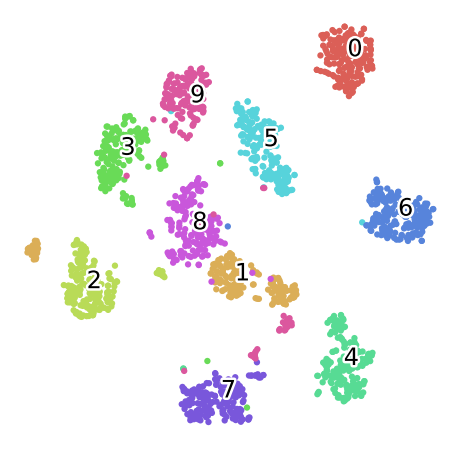

In [ ]:
#Podemos observar que las imágenes correspondientes a los diferentes dígitos están claramente separadas en diferentes grupos de puntos. 
scatter(digits_proj, y)